### Mode Statics

In [2]:
def getRangeIndex(evals, range_start, range_end):
    length = len(evals)
    start_idx = -1
    end_idx = -1

    for i in range(length):
        if (evals[i] >= range_start):
            if (start_idx == -1):
                start_idx = i
        if (evals[i] > range_end):
            if (end_idx == -1):
                end_idx = i

        if (start_idx != -1 and end_idx != -1):
            break
    
    if (start_idx != -1 and end_idx == -1):
        end_idx = length
    return start_idx, end_idx

In [3]:
import os
import numpy as np
import scipy.sparse

eigen_path = './DATA/eigen/'
file_list = ['T8', 'T128', 'T348', 'T468', 'T588']

sample = np.zeros((len(file_list), 100))


for i, name in enumerate(file_list):
    mass_file = os.path.join(eigen_path, name, 'M_coo.npz')
    stiff_file = os.path.join(eigen_path, name, 'K_coo.npz')

    M = scipy.sparse.load_npz(mass_file)
    K = scipy.sparse.load_npz(stiff_file)

    from scipy.sparse.linalg import eigsh
    evals, _ = eigsh(A=K, M=M, k=100, which='LM', sigma=0)
    sample[i] = evals


In [17]:
freqs = np.sqrt(sample) * 0.5 / np.pi
start_index = np.zeros(len(file_list))
end_index = np.zeros(len(file_list))

for i in range(len(file_list)):
    s, e=getRangeIndex(freqs[i], 20, 10000)
    start_index[i] = s
    end_index[i] = e

print(start_index)
print(end_index)

[3. 3. 3. 3. 3.]
[55. 60. 78. 67. 99.]


C:\Users\15179\.conda\envs\modaldemo\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [25]:
percent = np.zeros(100)

for modenum in range(100):
    rate_sum = 0
    for sample_idx in range(len(file_list)):
        rate = 0
        s = start_index[sample_idx]
        e = end_index[sample_idx] - 10

        if(modenum >= e):
            rate = 1
        elif(modenum <= s):
            rate = 0
        else:
            rate = (modenum - s) / (e - s)

        # print(f'with {modenum} mode, on sample{sample_idx}, cover_rate={rate}')
        rate_sum += rate

    rate_sum /= 1.0 * len(file_list)

    percent[modenum] = rate_sum

In [29]:
percent

array([0.        , 0.        , 0.        , 0.        , 0.01812343,
       0.03624686, 0.0543703 , 0.07249373, 0.09061716, 0.10874059,
       0.12686402, 0.14498746, 0.16311089, 0.18123432, 0.19935775,
       0.21748119, 0.23560462, 0.25372805, 0.27185148, 0.28997491,
       0.30809835, 0.32622178, 0.34434521, 0.36246864, 0.38059207,
       0.39871551, 0.41683894, 0.43496237, 0.4530858 , 0.47120923,
       0.48933267, 0.5074561 , 0.52557953, 0.54370296, 0.56182639,
       0.57994983, 0.59807326, 0.61619669, 0.63432012, 0.65244356,
       0.67056699, 0.68869042, 0.70681385, 0.72493728, 0.74306072,
       0.76118415, 0.77454567, 0.7879072 , 0.80126873, 0.81463026,
       0.82799178, 0.83709799, 0.8462042 , 0.85531041, 0.86441662,
       0.87352283, 0.88262903, 0.89173524, 0.89713775, 0.90254025,
       0.90794275, 0.91334526, 0.91874776, 0.92415027, 0.92955277,
       0.93495528, 0.94035778, 0.94576029, 0.95116279, 0.95348837,
       0.95581395, 0.95813953, 0.96046512, 0.9627907 , 0.96511

### 折线图

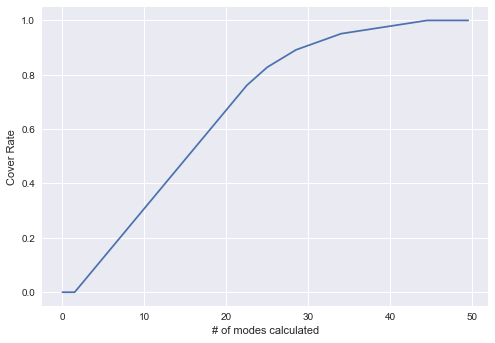

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

x = np.arange(100)

fig, ax = plt.subplots()
ax.plot(x / 2, percent[:100])

ax.set(xlabel='# of modes calculated', ylabel='Cover Rate',
    #    title='About as simple as it gets, folks'
       )
ax.grid(True)

plt.show()